In [2]:
# Import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
dataset_train = pd.read_csv("/content/AOPT_Sheet1.csv")
dataset_train.head ()

,Date,close price
0,04-01-2015,19.50
1,05-01-2015,19.00
2,06-01-2015,19.00
3,12-01-2015,18.95
4,13-01-2015,18.92


In [4]:
training_set = dataset_train.iloc[ :,1: 2].values
print(training_set)
print(training_set.shape)

[[19.5 ]
 [19.  ]
 [19.  ]
 ...
 [26.39]
 [26.35]
 [26.35]]
(1673, 1)


# Normalizing the Dataset

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler (feature_range = (0,1))
scaled_training_set = scaler.fit_transform(training_set)
scaled_training_set

array([[0.269085  ],
       [0.24201408],
       [0.24201408],
       ...,
       [0.64212236],
       [0.63995669],
       [0.63995669]])

# Creating X_train and y_train Data Structures

In [8]:
X_train = []
y_train = []
for i in range(60,1673):
  X_train.append(scaled_training_set[i-60:i, 0])
  y_train.append(scaled_training_set[i, 0])
X_train = np.array(X_train)
y_train = np.array(y_train)

In [10]:
print(X_train.shape)
print(y_train.shape)

(1613, 60)
(1613,)


#Reshape the Data

In [12]:
X_train = np.reshape (X_train, (X_train.shape [0], X_train.shape[1], 1))
X_train.shape

(1613, 60, 1)

# Building the Model by Importing the Crucial Libraries and Adding Different Layers to LSTM

In [13]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [15]:
regressor = Sequential ()
regressor.add(LSTM(units = 50, return_sequences= True, input_shape=(X_train. shape [1], 1)))
regressor.add(Dropout (.2))

regressor.add(LSTM(units = 50, return_sequences= True))
regressor.add (Dropout (.2))

regressor.add (LSTM(units = 58, return_sequences= True))
regressor.add (Dropout (.2))

regressor.add (LSTM(units = 50))
regressor.add (Dropout (.2))
               
regressor.add (Dense (units=1))

In [16]:
from tensorflow.keras.utils import plot_model

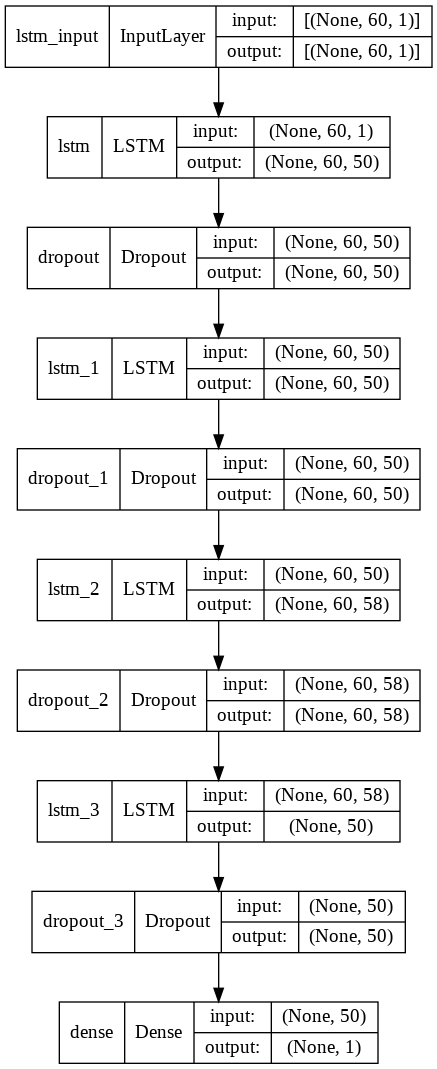

In [18]:
plot_model(regressor, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

#Fitting the Model

In [20]:
regressor.compile(optimizer = 'adam', loss= "mean_squared_error")
regressor.fit(X_train, y_train, epochs=16, batch_size=32)

Epoch 1/16
51/51 [==============================] - 14s 127ms/step - loss: 0.0029
Epoch 2/16
51/51 [==============================] - 7s 130ms/step - loss: 0.0026
Epoch 3/16
51/51 [==============================] - 7s 129ms/step - loss: 0.0025
Epoch 4/16
51/51 [==============================] - 7s 127ms/step - loss: 0.0026
Epoch 5/16
51/51 [==============================] - 7s 129ms/step - loss: 0.0024
Epoch 6/16
51/51 [==============================] - 7s 128ms/step - loss: 0.0023
Epoch 7/16
51/51 [==============================] - 7s 130ms/step - loss: 0.0021
Epoch 8/16
51/51 [==============================] - 7s 128ms/step - loss: 0.0022
Epoch 9/16
51/51 [==============================] - 7s 128ms/step - loss: 0.0020
Epoch 10/16
51/51 [==============================] - 7s 130ms/step - loss: 0.0019
Epoch 11/16
51/51 [==============================] - 7s 130ms/step - loss: 0.0021
Epoch 12/16
51/51 [==============================] - 7s 129ms/step - loss: 0.0017
Epoch 13/16
51/51 [=====

# Extracting the Actual Stock Prices of 2015-2021

In [51]:
dataset_test= pd.read_csv("/content/APOT_test.csv")
actual_stock_price = dataset_test.iloc[:,1:2].values

In [52]:
print(actual_stock_price)

[[26.4 ]
 [26.49]
 [26.31]
 [26.95]
 [26.75]
 [26.8 ]
 [26.5 ]
 [26.38]
 [26.4 ]
 [26.68]
 [26.45]
 [26.62]
 [26.62]
 [26.4 ]
 [26.4 ]
 [26.35]
 [26.35]
 [26.39]
 [26.35]
 [26.35]]


In [53]:
dataset_total = pd.concat((dataset_train['close price'], dataset_test['close price']), axis = 0)
inputs= dataset_total [len(dataset_total)- len(dataset_test) -60 : ].values

inputs= inputs.reshape(-1,1)
inputs= scaler.transform(inputs)

X_test= []
for i in range(60, 80):
  X_test.append (inputs[i -60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape [1], 1))

In [54]:
predicted_stock_price= regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

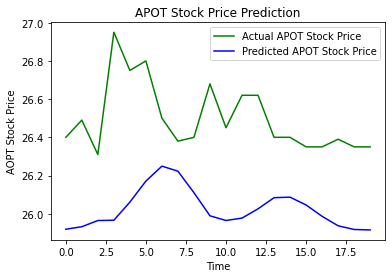

In [55]:
plt.plot(actual_stock_price, color = 'green', label = 'Actual APOT Stock Price ')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted APOT Stock Price')
plt.title('APOT Stock Price Prediction')
plt.xlabel('Time' )
plt.ylabel('AOPT Stock Price')
plt.legend ()

As you can see above, the model can predict the trend of the actual stock prices very closely. The accuracy of the model can be enhanced by training with more data and increasing the LSTM layers. I also recommend using batch normalization to maintain wweights as model gets bigger. My final recommendation is training the model more, this model is underfit as it has only gone through 16 epochs. 


In [56]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(actual_stock_price, predicted_stock_price)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 0.507754


In [57]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(actual_stock_price, predicted_stock_price)
print('MAE: %f' % mae)

MAE: 0.470790


We used root mean squared error and mean absolute error to describe error in the same units as the predictions. We can conclude that the model needs work as the RMSE and MAE values are very high.